In [1]:
#load librairies
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

For a definition of parameters, see main text.

# Occupation of both loxP sites
We assume that binding of LiCre at one loxP is independent from binding events at the other loxP site.

In [2]:
# fonction from Eliane to compute steady-state 
def proba_depending_on_concentration(K1, K2, N, C):
    """
    Function which plot the probability to be in each state at a concentration c
    P0: both loxP sites are empty
    P1: one Cre on only one loxP site, the other loxP site is empty
    P2m: two Cres on only one loxP site, the other loxP site is empty
    P2d: one Cre on each loxP site
    P3: one Cre on one loxP site and two Cre on the other
    P4: two Cre on each loxP site
    
    K1_Cre : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2_Cre : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    N : Number of points taken to discretize the concentration
    C : Concentration max taken
    
    """
    c = np.linspace(0.001, C, N)
    P0_s = lambda Cre : 1/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    P1_s = lambda Cre : 2*K1*Cre/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    P2_s = lambda Cre : K1*K2*Cre**2/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    
    P0 = lambda Cre : P0_s(Cre)**2
    P1 = lambda Cre : 2*P0_s(Cre)*P1_s(Cre)
    P2m = lambda Cre : 2*P0_s(Cre)*P2_s(Cre)
    P2d = lambda Cre : P1_s(Cre)**2
    P3 = lambda Cre : 2*P1_s(Cre)*P2_s(Cre)
    P4 = lambda Cre : P2_s(Cre)**2
    
    
    #plt.figure(figsize=(10,5))
    plt.plot(c, P0(c), label = "P0")
    plt.plot(c, P1(c), label = "P1")
    plt.plot(c, P2m(c), label = "P2m")
    plt.plot(c, P2d(c), label = "P2d")
    plt.plot(c, P3(c), label = "P3")
    plt.plot(c, P4(c), label = "P4")
    
    plt.plot(c, P0(c) + P1(c) + P2m(c) + P2d(c) + P3(c) + P4(c), label = "Sum")
    axes = plt.gca()
    axes.set_xlabel('Concentration',fontsize=20)
    axes.set_ylabel('P',fontsize=20)

    plt.legend(loc ="center right",fontsize=10)
    plt.show()

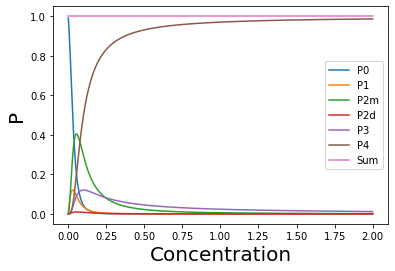

In [3]:
# plot the evolution of the occupancy probabilities as a function of Cre concentration
K1=1/0.49 #value taken from biacore estimation
K2=1/6.1e-3 #value taken from biacore estimation
Number_of_points = 1000
Concentration_max = 2 #in nM
proba_depending_on_concentration(K1, K2, Number_of_points, Concentration_max)

In [4]:
#function to specificically compute the probability to have two Cre on each loxP site
def P4(K1,K2,Cre):
    """
    
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    Cre : LiCre Concentration 
    
    """
    
    P2_s = K1*K2*Cre**2/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    return P2_s**2

# photo-activation of LiCre
We assume that the activation of one LiCre unit is independent from the state of the bound-LiCre units.

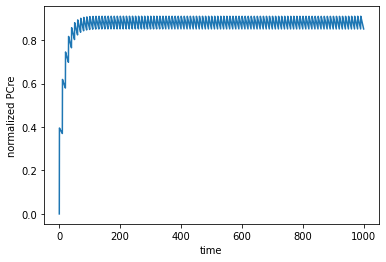

In [5]:
#Plot the probability Pact for a LiCre to be in the ON state, normalized by the maximum probability (kon/(kon+koff)) vs time
T=10. #period 
t=np.linspace(0,1000,10000)
duty=0.05 #duty cycle
ko=1 # on rate
kf=0.007 #off rate
sk=ko+kf;
tm=T*(ko*duty+kf)
n=np.floor(t/T)
plt.plot(t,np.heaviside(duty-(t/T-n),0)*((1-np.exp(-sk*(t-n*T)))+(1-np.exp(-sk*duty*T))*np.exp(-kf*(1-duty)*T)*(1-np.exp(-n*tm))/(1-np.exp(-tm))*np.exp(-sk*(t-n*T)))+np.heaviside((t/T-n)-duty,0)*(1-np.exp(-sk*duty*T))*(1-np.exp(-(n+1)*tm))/(1-np.exp(-tm))*np.exp(-kf*(t-n*T-duty*T)))

axes = plt.gca()
axes.set_xlabel('time')
axes.set_ylabel('normalized PCre')
plt.show()

In [6]:
# function to compute the probability Pact for a LiCre to be in the ON state Pact
def pcre(t,ko,kf,T,duty):
    """
    t : time
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    sk=ko+kf;
    tm=T*(ko*duty+kf)
    n=np.floor(t/T)
    return (ko/(ko+kf))*(np.heaviside(duty-(t/T-n),0)*((1-np.exp(-sk*(t-n*T)))+(1-np.exp(-sk*duty*T))*np.exp(-kf*(1-duty)*T)*(1-np.exp(-n*tm))/(1-np.exp(-tm))*np.exp(-sk*(t-n*T)))+np.heaviside((t/T-n)-duty,0)*(1-np.exp(-sk*duty*T))*(1-np.exp(-(n+1)*tm))/(1-np.exp(-tm))*np.exp(-kf*(t-n*T-duty*T)))

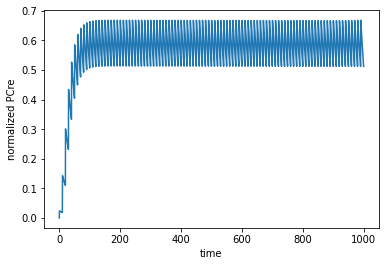

In [7]:
#Plot the probability that at least x among 4 LiCre units are currently in the activated state vs time
T=10. #period
t=np.linspace(0,1000,10000)
duty=0.05 #duty cycle
ko=1 # on rate
kf=0.007 #off rate
sk=ko+kf;
tm=T*(ko*duty+kf)
n=np.floor(t/T)
plt.plot(t,pcre(t,ko,kf,T,duty)**4)

#plt.plot(t,(1-(1-pcre(t,ko,kf,T,duty))**4)) #at least one
#plt.plot(t,((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))+6*(pcre(t,ko,kf,T,duty))**2*(1-pcre(t,ko,kf,T,duty))**2)) #at least 2
#plt.plot(t,((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty)))) #at least 3
#plt.plot(t,(pcre(t,ko,kf,T,duty))**4) # at least 4

axes = plt.gca()
axes.set_xlabel('time')
axes.set_ylabel('normalized PCre')
plt.show()

# Recombination reaction
$R(t)=R_0 P_{2,2} A_x(t)$ with $P_{2,2}$ the probability that the 4 LiCre are on the loxP sites, $A_x(t)$ proba that at least $x$ LiCre are activated. If we note $p$ the proba for a cell to be still not excised at a time t: $dp(t)/dt = -R(t) p(t)$.
Solution: $p(t)=\exp[-\int_{0}^t dt' R(t')]$.

In [25]:
#reaction rate 
def R(t,R0,K1,K2,LiCre,ko,kf,duty,T):
    """
    t : time
    R0 : maximal reaction rate
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    LiCre : LiCre Concentration
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    return R0*P4(K1,K2,LiCre)*((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))+6*(pcre(t,ko,kf,T,duty))**2*(1-pcre(t,ko,kf,T,duty))**2)

#(1-(1-pcre(t,ko,kf,T,duty))**4) #at least one
#((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))+6*(pcre(t,ko,kf,T,duty))**2*(1-pcre(t,ko,kf,T,duty))**2) #at least 2
#((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))) #at least 3
#(pcre(t,ko,kf,T,duty))**4 # at least 4

In [26]:
# compute the probability for not having recombined
def p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T):
    """
    tmax : maximal time to compute p
    dt : time step
    R0 : maximal reaction rate
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    LiCre : LiCre Concentration
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    t=np.arange(0,tmax,dt)
    rt=R(t,R0,K1,K2,LiCre,ko,kf,duty,T)
    return np.exp(-np.cumsum(rt)*dt)

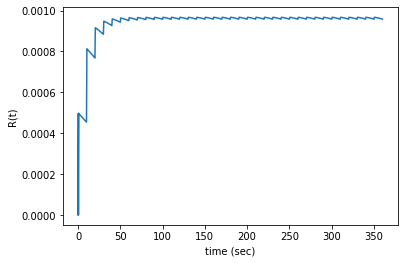

In [27]:
# plot the reaction rate as a function of time
tmax=360
dt=0.001
R0=1/1000 #in sec^-1
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
LiCre=1 #in nM
T=10. #period in sec
duty=0.5/10 #duty cycle
ko=1 # on rate in sec^-1
kf=0.007 #off rate in sec^-1
t=np.arange(0,tmax,dt)
plt.plot(t,R(t,R0,K1,K2,LiCre,ko,kf,duty,T))
axes = plt.gca()
axes.set_xlabel('time (sec)')
axes.set_ylabel('R(t)')
plt.show()

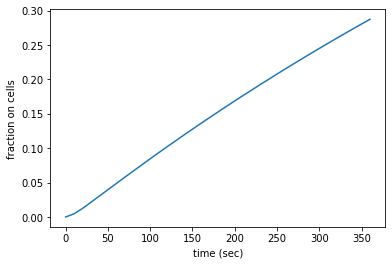

In [28]:
#plot the fraction of ON cell as a function of time
plt.plot(np.arange(0,tmax,dt),1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T))
axes = plt.gca()
axes.set_xlabel('time (sec)')
axes.set_ylabel('fraction on cells')
plt.show()

## fit $R_0$ and $k_{off}$
For a given $x$ value, for each set of data, we varied systematically $R_0$ and $k_{off}$ and compute a $\chi^2$-like score.

In [29]:
f=0.87 #normalization factor of multiplication of experimental data

### loading datasets

In [30]:
df = pd.read_table('./paper/20250204_koff_twocolors-counts_LiCrevsMut6_MedForFits.txt',usecols=[0,7,8,9,19,31])

In [31]:
df

,duration,construct,duty,period,RED,REDstd
0,0,LiCre,10.0,10.0,0.032123,0.008262
1,420,LiCre,10.0,10.0,0.079618,0.026973
2,1200,LiCre,10.0,10.0,0.243772,0.005464
3,3600,LiCre,10.0,10.0,0.448785,0.059085
4,0,LiCre,10.0,60.0,0.021916,0.010377
5,420,LiCre,10.0,60.0,0.055110,0.003509
6,1200,LiCre,10.0,60.0,0.095918,0.031593
7,3600,LiCre,10.0,60.0,0.308608,0.019407
8,0,LiCre,20.0,10.0,0.028971,0.014847
9,420,LiCre,20.0,10.0,0.092701,0.023820


### WT

In [32]:
#compute the chi2 for several R0 and koff
tmax=3600 #in sec
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
LiCre=1 #in nM
timel=np.array([420,1200,3600]) #time


tm0=time.time()

chi2WT=np.zeros((31,41))


fi=np.zeros(int(tmax/dt))
    
for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(41):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1
        
        for ic in range(6):
            T=df.period[ic*4] #period
            duty=df.duty[ic*4]/100 #duty cycle
            
            fi=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
            
            frm=np.array(df.RED[(ic*4+1):(ic*4+4)])
            
            chi2WT[ir,ik]=chi2WT[ir,ik]+np.nansum((fi[(timel/dt-1).astype(int)]-frm/f)**2)
            
print(time.time()-tm0)

430.61039900779724


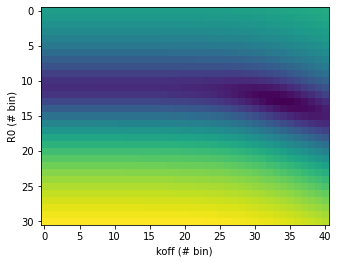

(13, 34) 0.09723098102061258


In [33]:
#plot the matrix of chi2-score
a=chi2WT
plt.imshow(np.log10(a))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(a, axis=None), a.shape) #minimum value
print(ind,np.sqrt(a[ind]/7))

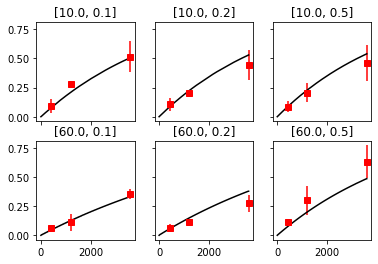

In [34]:
#plot the dataset and the model prediction for fixed R0 adn koff value
tmax=3600 #in sec
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
LiCre=1 #in nM
timel=np.array([420,1200,3600]) #time

R0=10**(-4.3+0.05*13) #in sec^-1
kf=0.005*10**(-0.8+0.05*34) #off rate in sec^-1


fig, axs = plt.subplots(2, 3,sharex=True,sharey=True)
fiwt=np.zeros((6,int(tmax/dt)))


for ic in range(6):
    T=df.period[ic*4] #period
    duty=df.duty[ic*4]/100 #duty cycle
            
    fiwt[ic,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
            
    frm=np.array(df.RED[(ic*4+1):(ic*4+4)])
    frs=np.array(df.REDstd[(ic*4+1):(ic*4+4)])
    
    axs[np.mod(ic,2), ic//2].errorbar(timel,frm/f,yerr=2*frs/f,fmt='sr')
    axs[np.mod(ic,2), ic//2].plot(np.arange(0,tmax,dt),fiwt[ic,:],'k')
    axs[np.mod(ic,2), ic//2].set_title([T,duty])

plt.show()

In [35]:
print('R0=',R0,' kf=',kf)

R0= 0.000223872113856834  kf= 0.03971641173621409


### Mut6

In [36]:
#compute the chi2 for several R0 and koff
tmax=3600 #in sec
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
LiCre=1 #in nM
timel=np.array([420,1200,3600]) #time


tm0=time.time()

chi2mut=np.zeros((31,41))


fi=np.zeros(int(tmax/dt))
    
for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(41):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1
        
        for ic in range(6):
            T=df.period[24+ic*4] #period
            duty=df.duty[24+ic*4]/100 #duty cycle
            
            fi=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
            
            frm=np.array(df.RED[(24+ic*4+1):(24+ic*4+4)])
            
            chi2mut[ir,ik]=chi2mut[ir,ik]+np.nansum((fi[(timel/dt-1).astype(int)]-frm/f)**2)
            
print(time.time()-tm0)

422.2893760204315


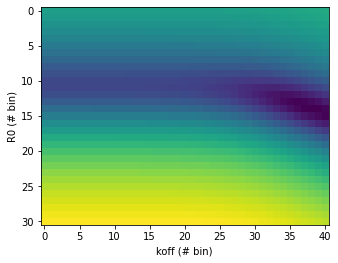

(14, 38) 0.0943022639979179


In [37]:
#plot the matrix of chi2-score
b=chi2mut
plt.imshow(np.log10(b))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(b, axis=None), b.shape) #minimum value
print(ind,np.sqrt(b[ind]/7))            

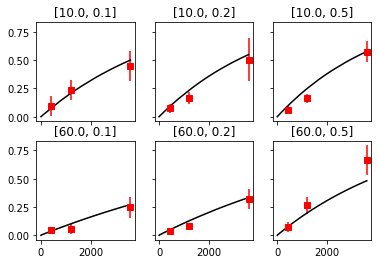

In [38]:
#plot the dataset and the model prediction for fixed R0 adn koff value
tmax=3600 #in sec
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
LiCre=1 #in nM
timel=np.array([420,1200,3600]) #time

R0=10**(-4.3+0.05*14) #in sec^-1
kf=0.005*10**(-0.8+0.05*38) #off rate in sec^-1


fig, axs = plt.subplots(2, 3,sharex=True,sharey=True)

fimut=np.zeros((6,int(tmax/dt)))

for ic in range(6):
    T=df.period[24+ic*4] #period
    duty=df.duty[24+ic*4]/100 #duty cycle
            
    fimut[ic,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
            
    frm=np.array(df.RED[(24+ic*4+1):(24+ic*4+4)])
    frs=np.array(df.REDstd[(24+ic*4+1):(24+ic*4+4)])
    
    axs[np.mod(ic,2), ic//2].errorbar(timel,frm/f,yerr=2*frs/f,fmt='sr')
    axs[np.mod(ic,2), ic//2].plot(np.arange(0,tmax,dt),fimut[ic,:],'k')
    axs[np.mod(ic,2), ic//2].set_title([T,duty])

plt.show()

In [39]:
print('R0=',R0,' kf=',kf)

R0= 0.0002511886431509582  kf= 0.06294627058970838


###  best fit duty cycle

In [40]:
fracdutywtexp=np.zeros((2,3))
fracdutymutexp=np.zeros((2,3))
fracdutywtexpstd=np.zeros((2,3))
fracdutymutexpstd=np.zeros((2,3))
fracdutywtpred=np.zeros((2,3))
fracdutymutpred=np.zeros((2,3))
for ic in range(6):
    fracdutywtexp[np.mod(ic,2), ic//2]=df.RED[ic*4+3]
    fracdutymutexp[np.mod(ic,2), ic//2]=df.RED[24+ic*4+3]
    fracdutywtexpstd[np.mod(ic,2), ic//2]=df.REDstd[ic*4+3]
    fracdutymutexpstd[np.mod(ic,2), ic//2]=df.REDstd[24+ic*4+3]
    fracdutywtpred[np.mod(ic,2), ic//2]=fiwt[ic,-1]
    fracdutymutpred[np.mod(ic,2), ic//2]=fimut[ic,-1]

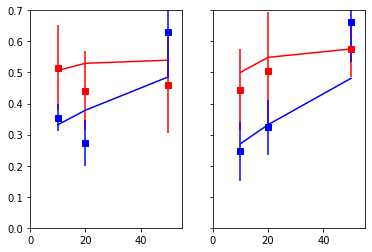

In [41]:
fig, axs = plt.subplots(1, 2,sharex=True,sharey=True)
axs[0].set_xlim([0, 55])
axs[0].set_ylim([0, 0.7])
axs[0].errorbar([10,20,50],fracdutywtexp[0,:]/f,yerr=2*fracdutywtexpstd[0,:]/f,fmt='sr')
axs[0].plot([10,20,50],fracdutywtpred[0,:],'r')
axs[0].errorbar([10,20,50],fracdutywtexp[1,:]/f,yerr=2*fracdutywtexpstd[1,:]/f,fmt='sb')
axs[0].plot([10,20,50],fracdutywtpred[1,:],'b')
axs[1].errorbar([10,20,50],fracdutymutexp[0,:]/f,yerr=2*fracdutymutexpstd[0,:]/f,fmt='sr')
axs[1].plot([10,20,50],fracdutymutpred[0,:],'r')
axs[1].errorbar([10,20,50],fracdutymutexp[1,:]/f,yerr=2*fracdutymutexpstd[1,:]/f,fmt='sb')
axs[1].plot([10,20,50],fracdutymutpred[1,:],'b')

plt.show()